In [17]:
set.seed(42)
train_set = read.delim("data/train_set.txt", sep = " ")
test_set = read.delim("data/test_set.txt", sep = " ")

train_set["rain"] = NULL
train_set["rain_log"] = NULL

test_set["rain"] = NULL
test_set["rain_log"] = NULL

train_set[,"rain_class"] = as.factor(train_set[,"rain_class"])
test_set[,"rain_class"] = as.factor(test_set[,"rain_class"])

In [18]:
exp_var = setdiff(names(train_set), c("rain"))

In [19]:
x_train = as.matrix(train_set[, exp_var])
x_test = as.matrix(test_set[, exp_var])

y_train = as.factor(train_set[,"rain_class"])
y_test = as.factor(test_set[,"rain_class"])

In [20]:
library(rpart)

In [21]:
confusion_matrix = function(pred_class, true_class){
    tab = table(pred_class, true_class)
    print("Confusion matrix")
    print(tab)
    acc = sum(diag(tab)) / sum(tab)
    print(paste("Prediction accuracy : ", acc))
}

## 5.2. Decision Tree

In [41]:
tree = rpart(rain_class ~ ., data = train_set, control = rpart.control(cp = 0.0001, nsplit = 10))
summary(tree)

Call:
rpart(formula = rain_class ~ ., data = train_set, control = rpart.control(cp = 1e-04, 
    nsplit = 10))
  n= 550 

             CP nsplit rel error    xerror       xstd
1  0.0854430380      0 1.0000000 1.0000000 0.03669298
2  0.0443037975      2 0.8291139 0.8829114 0.03710379
3  0.0316455696      4 0.7405063 0.8734177 0.03710747
4  0.0189873418      5 0.7088608 0.8860759 0.03710159
5  0.0158227848      6 0.6898734 0.8797468 0.03710551
6  0.0126582278      7 0.6740506 0.8797468 0.03710551
7  0.0118670886      9 0.6487342 0.8829114 0.03710379
8  0.0094936709     13 0.6012658 0.8829114 0.03710379
9  0.0079113924     16 0.5727848 0.8860759 0.03710159
10 0.0063291139     23 0.5158228 0.8892405 0.03709889
11 0.0052742616     25 0.5031646 0.8860759 0.03710159
12 0.0047468354     28 0.4873418 0.8765823 0.03710674
13 0.0031645570     30 0.4778481 0.8765823 0.03710674
14 0.0015822785     31 0.4746835 0.8765823 0.03710674
15 0.0007911392     33 0.4715190 0.8955696 0.03709201
16 0.000100000

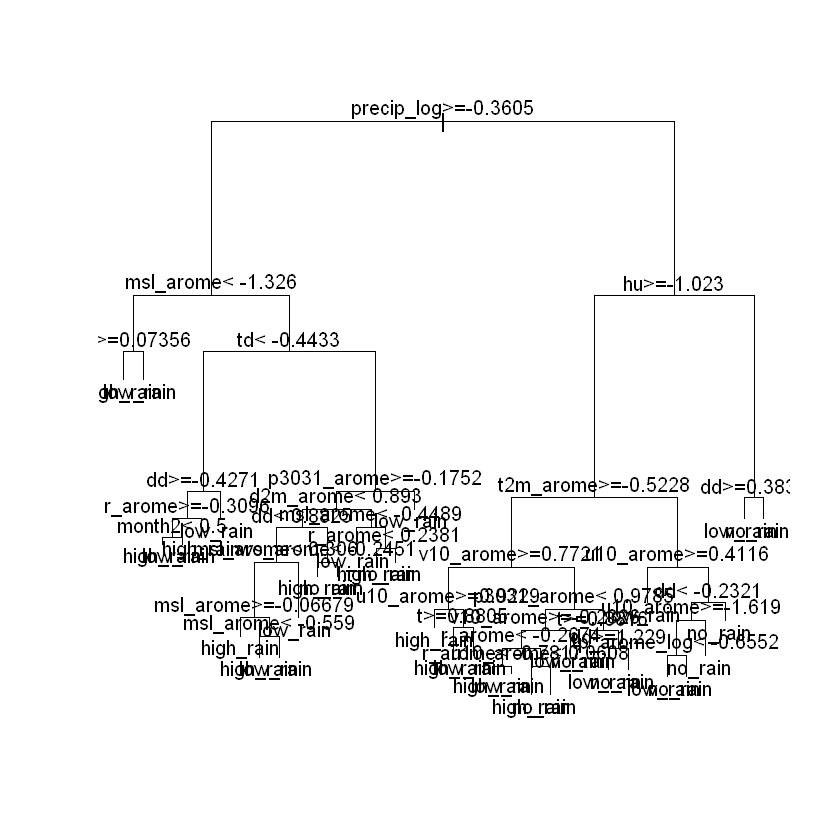

In [39]:
plot(tree)
text(tree)

In [42]:
confusion_matrix(predict(tree, newdata = train_set, type = "class"), y_train)
confusion_matrix(predict(tree, newdata = test_set, type = "class"), y_test)

[1] "Confusion matrix"
           true_class
pred_class  high_rain low_rain no_rain
  high_rain       125       32      13
  low_rain         19      172      43
  no_rain          11       30     105
[1] "Prediction accuracy :  0.730909090909091"
[1] "Confusion matrix"
           true_class
pred_class  high_rain low_rain no_rain
  high_rain        16       15      11
  low_rain         12       27      20
  no_rain           5       16      16
[1] "Prediction accuracy :  0.427536231884058"


## Aggregation of Models